# Modelo MLP (Multilayer Perceptron)

**Autor:** Gerardo Rios Mejía

**Descripción:** Este notebook realiza el desarrollo, entrenamiento y evaluación del modelo Multilayer Perceptron utilizando distintas técnicas como el ajuste de hiperparámetros con GridSearchCV, validación cruzada estratificada (Stratified K-Fold), y análisis comparativo mediante métricas como AUC, TPR, FPR, curvas ROC y curvas de pérdida.

In [1]:
#LIBRERIAS UTILIZADAS
import os
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier

In [2]:
#FUNCIONES PERSONALIZADAS PARA LOS MODELOS
sys.path.append(os.path.abspath("../funciones"))

#IMPORAR FUNCIONES AUXILIARES PERSONALIZADAS DESDE EL MÓDULO
from funcionesEntrenamiento import (
    cargar_datos_entrenamiento,
    cargar_datos_prueba,
    imprimir_forma,
    division_train_val,
    reporte_clasificacion,
    crear_matriz_confusion,
    calcular_roc_auc,
    metricas_tpr_fpr,
    hacer_pepinillo
)

In [3]:
#CARGA Y PREPARACIÓN DE DATOS DE ENTRENAMIENTO
X, y = cargar_datos_entrenamiento()

shape, head = imprimir_forma(X)
print("Shape: ", shape)
head

Shape:  (1500, 1568)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1490,tfidf_1491,tfidf_1492,tfidf_1493,tfidf_1494,tfidf_1495,tfidf_1496,tfidf_1497,tfidf_1498,tfidf_1499
0,0.238798,-0.062255,0,0,0,0,0,1.168716,0.355986,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.536538,-1.607600,0,0,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.453282,-0.283019,3,2,0,0,0,0.789926,0.952018,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.329069,0.158508,0,0,0,1,0,1.774781,0.654002,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.784277,-0.724546,0,0,0,1,0,-1.331300,0.952018,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#DIVISIÓN PARA EL ENTRENAMIENTO/VALIDACIÓN
X_train, X_val, y_train, y_val = division_train_val(X, y)

train_shape, _ = imprimir_forma(X_train)
val_shape, _ = imprimir_forma(X_val)
print(f"Forma de conjunto de entrenamiento:", train_shape)
print(f"Forma de conjunto de validación:", val_shape)

Forma de conjunto de entrenamiento: (1200, 1568)
Forma de conjunto de validación: (300, 1568)


# Valores default

In [5]:
#MODELO INICIAL CON VALORES DEFAULT
mlp_inicial = MLPClassifier(random_state=22)

scores = cross_val_score(mlp_inicial, X_train, y_train, cv=5, scoring='roc_auc')

print("Resultados por fold:", scores)
print("Precisión promedio:", scores.mean())

c:\Users\z47al\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Resultados por fold: [0.93707661 0.94077799 0.92604232 0.91650391 0.96299526]
Precisión promedio: 0.9366792166244837


In [6]:
mlp_inicial.fit(X_train, y_train)

MLPClassifier(random_state=22)

In [7]:
#CREACIÓN DEL REPORTE DE CLASIFICACIÓN
y_pred_inicial, y_proba_inicial, reporte_inicial = reporte_clasificacion(X_val, y_val, mlp_inicial)

print("Classification Report:")
print(reporte_inicial)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       139
           1       0.86      0.84      0.85       161

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



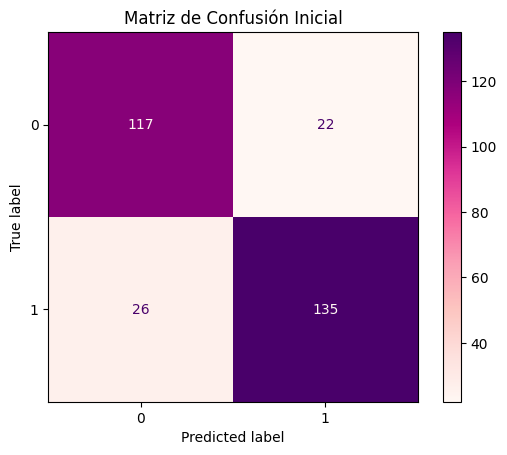

In [8]:
#MATRIZ DE CONFUSIÓN
cm_inicial, disp_inicial = crear_matriz_confusion(y_val, y_pred_inicial)
disp_inicial.plot(cmap='RdPu')
plt.title("Matriz de Confusión Inicial")
plt.show()

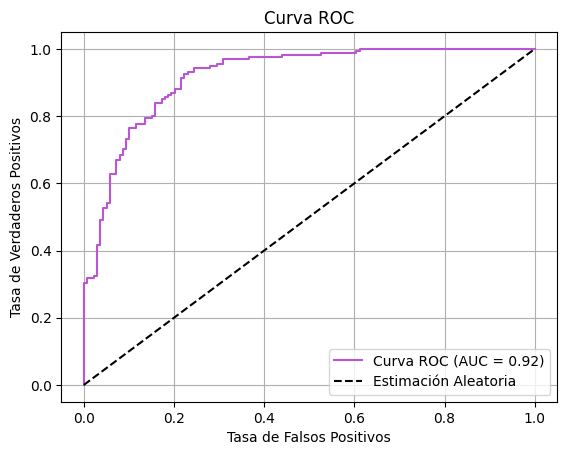

In [9]:
#CURVA ROC
fpr_inicial, tpr_inicial, thresholds_inicial, auc_score_inicial = calcular_roc_auc(y_val, y_proba_inicial)

plt.figure()
plt.plot(fpr_inicial, tpr_inicial, color='mediumorchid', label=f"Curva ROC (AUC = {auc_score_inicial:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [10]:
#MÉTRICAS TPR/FPR
TPR_inicial, FPR_inicial = metricas_tpr_fpr(cm_inicial)

# Mostrar métricas
print(f"AUC: {(auc_score_inicial * 100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR_inicial * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_inicial * 100):.4f}")

AUC: 91.9299
TPR (Tasa de Positivos Verdaderos): 83.8509
FPR (Tasa de Falsos Positivos): 15.8273


# Busquedas de mejores parámetros (Entrenamiento y Validación)

In [34]:
#BÚSQUEDA DE HIPERPARÁMETROS UTILIZANDO GRIDSEARCH
mlp = MLPClassifier(random_state= 22)

param_grid = {
    'hidden_layer_sizes': [
        (300, 200, 100),
        (400, 300, 200, 100),
        (500, 400, 300, 200, 100),
        (100, 50, 25, 10),

    ],
    'activation': ['logistic', 'relu', 'tanh', 'identity'],
    'solver': ['adam', 'lbfgs', 'sgd'],
    'learning_rate': ['adaptive', 'constant', 'invscaling'],
    'max_iter': [50, 60, 70, 80, 90, 100]
}
cv = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=22
)

#BUSQUEDA UTILZANDO GRIDSEARCH
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

In [35]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\z47al\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             error_score='raise', estimator=MLPClassifier(random_state=22),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh', 'identity'],
                         'hidden_layer_sizes': [(400, 300, 200, 100)],
                         'learning_rate': ['adaptive', 'constant',
                                           'invscaling'],
                         'max_iter': [50, 60],
                         'solver': ['adam', 'lbfgs', 'sgd']},
             scoring='roc_auc', verbose=1)

In [36]:
#CLASIFICADOR DE LOS MEJORES PARAMETROS
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (400, 300, 200, 100),
 'learning_rate': 'adaptive',
 'max_iter': 50,
 'solver': 'adam'}

In [61]:

best_mlp = MLPClassifier(
    hidden_layer_sizes=(400, 300, 200, 100),
    activation='logistic',
    solver='adam',
    learning_rate='adaptive',
    max_iter=50,
    random_state=22
)

best_mlp.fit(X_train, y_train)

c:\Users\z47al\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(400, 300, 200, 100),
              learning_rate='adaptive', max_iter=50, random_state=22)

In [62]:
#REPORTE DE CLASIFICACIÓN
y_pred, y_proba, reporte = reporte_clasificacion(X_val, y_val, best_mlp)

print("Classification Report:")
print(reporte)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.86      0.86      0.86       161

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



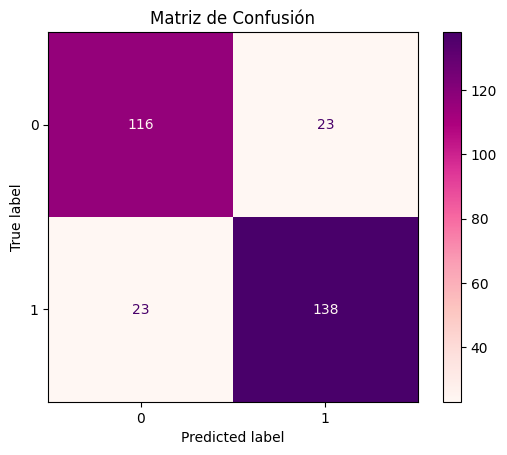

In [63]:
#MATRIZ DE CONFUSIÓN
cm, disp = crear_matriz_confusion(y_val, y_pred)
disp.plot(cmap="RdPu")
plt.title("Matriz de Confusión")
plt.show()

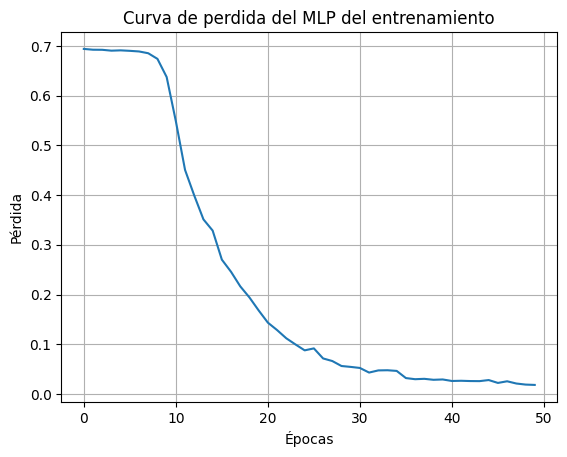

In [64]:
#CURVA DE PERDIDA DEL MLP
plt.plot(best_mlp.loss_curve_)
plt.title("Curva de perdida del MLP del entrenamiento")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

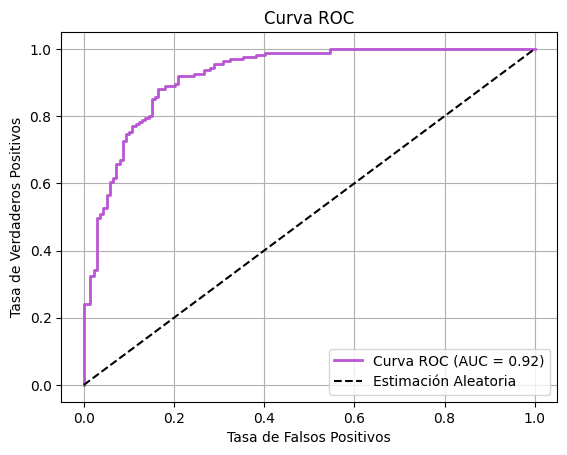

In [65]:
#CURVA ROC

fpr, tpr, thresholds, auc_score = calcular_roc_auc(y_val, y_proba)

plt.figure()
plt.plot(fpr, tpr, color='mediumorchid', lw=2, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], "k--", label="Estimación Aleatoria")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [66]:
TPR, FPR = metricas_tpr_fpr(cm)

#Mostrar métricas
print(f"AUC: {(auc_score*100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR*100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR*100):.4f}")

AUC: 92.2472
TPR (Tasa de Positivos Verdaderos): 85.7143
FPR (Tasa de Falsos Positivos): 16.5468


## Modelo Final (Entrenamiento y Prueba)

In [67]:
#EVALUACIÓN CON CONJUNTOS DE PRUEBA FINAL
modelMLP = MLPClassifier(
    hidden_layer_sizes=(400, 300, 200, 100),
    activation='logistic',
    solver='adam',
    learning_rate='adaptive',
    max_iter=50,
    random_state=22
)

modelMLP.fit(X, y)

c:\Users\z47al\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(400, 300, 200, 100),
              learning_rate='adaptive', max_iter=50, random_state=22)

In [68]:
X_test, y_test = cargar_datos_prueba()

shape_test, head_test = imprimir_forma(X_test)
print("Shape test: ", shape_test)
head_test

Shape test:  (250, 1568)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1490,tfidf_1491,tfidf_1492,tfidf_1493,tfidf_1494,tfidf_1495,tfidf_1496,tfidf_1497,tfidf_1498,tfidf_1499
0,-0.393101,-0.503783,0,1,0,0,0,0.966695,1.349373,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.315037,2.366144,0,1,0,1,1,-0.194929,0.542246,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.874548,-0.724546,2,2,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.178617,-0.283019,1,3,0,1,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.315037,3.249199,1,3,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#REPORRTE DE CLASIFICACIÓN FINAL
y_pred_test, y_proba_test, reporte_test = reporte_clasificacion(X_test, y_test, modelMLP)

print("Classification Report:")
print(reporte_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       116
           1       0.82      0.91      0.86       134

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250



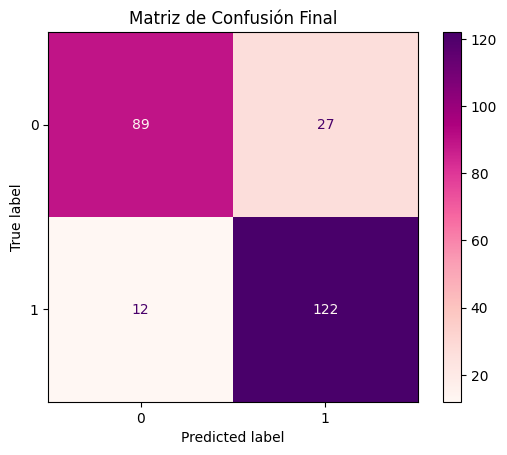

In [70]:
#MATRIZ DE CONFUSIÓN FINAL
cm_test, disp_test = crear_matriz_confusion(y_test, y_pred_test)
disp_test.plot(cmap="RdPu")
plt.title("Matriz de Confusión Final")
plt.show()

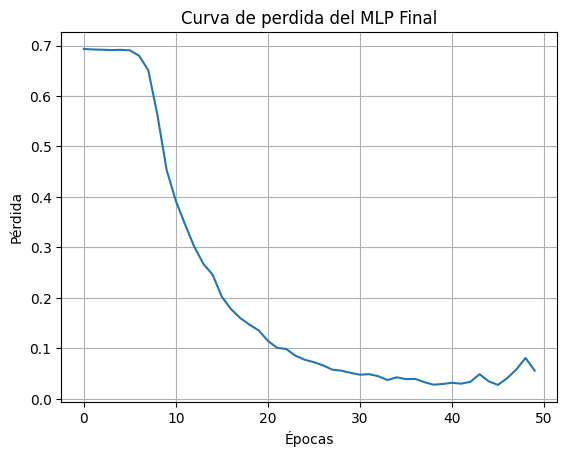

In [71]:
#CURVA DE PERDIDA DEL MLP FINAL
plt.plot(modelMLP.loss_curve_)
plt.title("Curva de perdida del MLP Final")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.grid(True)
plt.show()

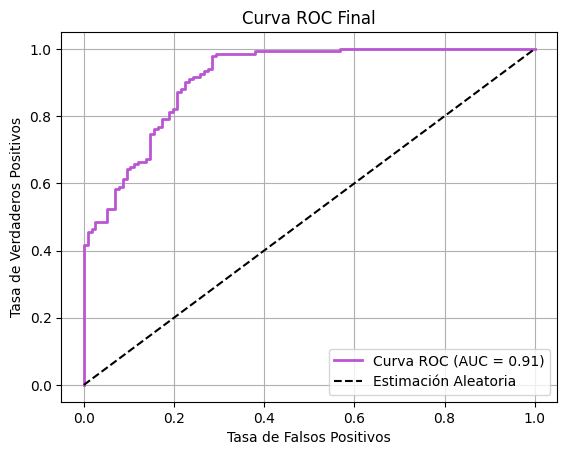

In [72]:
#CURVA ROC FINAL
fpr_test, tpr_test, thresholds_test, auc_score_test = calcular_roc_auc(y_test, y_proba_test)

plt.figure()
plt.plot(fpr_test, tpr_test, color='mediumorchid', lw=2, label=f'Curva ROC (AUC = {auc_score_test:.2f})')
plt.plot([0, 1], [0, 1], "k--", label="Estimación Aleatoria")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Final')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [73]:
TPR_test, FPR_test = metricas_tpr_fpr(cm_test)

#Mostrar métricas
print(f"AUC: {(auc_score_test*100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR_test*100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_test*100):.4f}")

AUC: 91.3150
TPR (Tasa de Positivos Verdaderos): 91.0448
FPR (Tasa de Falsos Positivos): 23.2759


In [74]:
#GUARDAR MODELO FINAL SEREALIZADO (PEPINILLO)
hacer_pepinillo(modelMLP, "modelMLP.pkl")